##**Problem Statement:**
**The Challenge is to build a Deep learning model and code to count the number of Capuchinbird calls within a given clip.**
##**1.Import and Install Dependencies**

## 1.1 Install Dependencies

In [ ]:
!pip install tensorflow==2.7.1 tensorflow-gpu==2.7.1 tensorflow-io matplotlib

## 1.2 Load Dependencies

In [ ]:
!pip install tensorflow-io==0.23.1

In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

# 2. Build Data Loading Function

## 2.1 Define Paths to Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
base_path = "/content/drive/MyDrive/NLP PROJECTS/deep audio"
CAPUCHIN_FILE = os.path.join(base_path, 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join(base_path,'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

Mounted at /content/drive


In [ ]:
CAPUCHIN_FILE

'/content/drive/MyDrive/NLP PROJECTS/deep audio/Parsed_Capuchinbird_Clips/XC3776-3.wav'

## 2.2 Build Dataloading Function

In [ ]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
file_contents = tf.io.read_file(CAPUCHIN_FILE)

In [ ]:
file_contents 

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF\xbc\t\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data\x98\t\x04\x00\xc5\xf1(\xfb\x7f\x07F\x13|\x1c\xa3$\x07.R8\x03A\xbaF\xb6J\xb4NQR\x92S\x95Q\xa1M/I\xb3CJ;\x88/\xa2"X\x17\x12\x0e\xce\x04\xdd\xf9\x07\xeei\xe3\xc3\xda\xa5\xd2\xae\xc9\xc4\xc0P\xbaB\xb7\xb5\xb5-\xb3\xaa\xaf\xad\xad\x00\xafd\xb22\xb5\xeb\xb6\xf5\xb9m\xc0\x1e\xc9\xc6\xd0-\xd6\xba\xdbO\xe4[\xefG\xf9\xd2\xff\xc3\x04\x87\x0b\xec\x14m\x1e\xc6%\xc4+\xb22\xa3:\xd7@\x17C\x86B8BoC[D\xc5B\xda>\x9e:\x117\xeb2`,_#\x93\x19\x82\x10X\x08M\x00\xb2\xf7j\xee\t\xe5\xc1\xdc\xbc\xd6\xf3\xd2\xeb\xcfV\xcc\x1c\xc9\xc5\xc8b\xcc\x95\xd1\xe6\xd4\xe4\xd5\xda\xd7\xb2\xdd\x13\xe6\xf3\xec\xc8\xf0\x99\xf4\x00\xfc@\x06\xed\x0eX\x13\x94\x154\x19:\x1e!!\xcb\x1fj\x1cu\x1a\xdd\x19A\x17\xd6\x100\t\t\x04f\x01\xd3\xfd_\xf7\x84\xf0\xf7\xec\xb5\xec\x16\xec\xc1\xe8\xd8\xe4.\xe4V\xe72\xeb<\xed\xad\xeeb\xf2\xc1\xf8E\xff\x00\x04\x04\x08t\r!\x14\x83\x19\xfe\x1b\xd6\x1cJ\x1e\x

In [ ]:
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [ ]:
#checking the frequency of the wave
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

In [ ]:
wav = tf.squeeze(wav, axis=-1)
sample_rate = tf.cast(sample_rate, dtype=tf.int64)

In [ ]:
 #converting the audio clip from 44100 khz to 16000khz
 wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)

## 2.3 Plot Wave

In [ ]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

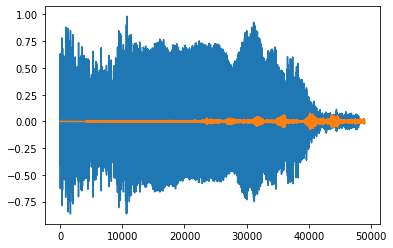

In [ ]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# 3. Create Tensorflow Dataset

## 3.1 Define Paths to Positive and Negative Data

In [ ]:
POS = os.path.join(base_path, 'Parsed_Capuchinbird_Clips')
NEG = os.path.join(base_path, 'Parsed_Not_Capuchinbird_Clips')

## 3.2 Create Tensorflow Datasets

In [ ]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

## 3.3 Add labels and Combine Positive and Negative Samples

In [ ]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

# 4. Determine Average Length of a Capuchin Call

## 4.1 Calculate Wave Cycle Length

In [ ]:
lengths = []
for file in os.listdir(os.path.join(base_path, 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join(base_path, 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

## 4.2 Calculate Mean, Min and Max

In [ ]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [ ]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [ ]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# 5. Build Preprocessing Function to Convert to Spectrogram

## 5.1 Build Preprocessing Function

In [ ]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

## 5.2 Test Out the Function and Viz the Spectrogram

In [ ]:
filepath, label = positives.shuffle(buffer_size=1000).as_numpy_iterator().next()

In [ ]:
spectrogram, label = preprocess(filepath, label)

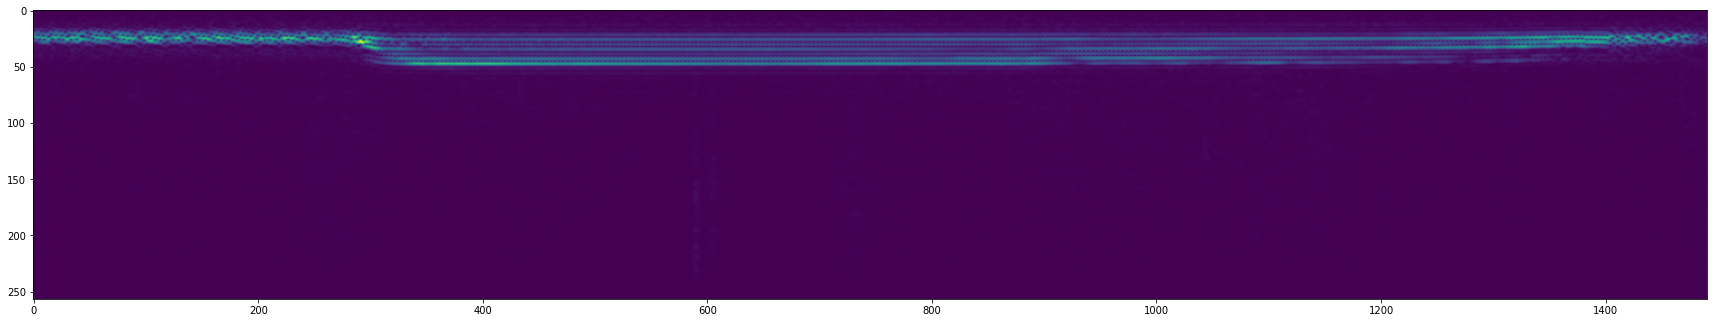

In [ ]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# 6. Create Training and Testing Partitions

## 6.1 Create a Tensorflow Data Pipeline

In [ ]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

## 6.2 Split into Training and Testing Partitions

In [ ]:
train = data.take(36)
test = data.skip(36).take(15)

## 6.3 Test One Batch

In [ ]:
samples, labels = train.as_numpy_iterator().next()

In [ ]:
samples.shape

(16, 1491, 257, 1)

# 7. Build Deep Learning Model

## 7.1 Load Tensorflow Dependencies

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

## 7.2 Build Sequential Model, Compile and View Summary

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 1)                 6019377   
                                                                 
Total params: 6,021,857
Trainable params: 6,021,857
Non-trainable params: 0
_________________________________________________________________


## 7.3 Fit Model, View Loss and KPI Plots

In [ ]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
36/36 [==============================] - 250s 7s/step - loss: 1.4148 - recall: 0.8581 - precision: 0.8867 - val_loss: 0.1397 - val_recall: 0.9818 - val_precision: 0.9643
Epoch 2/4
36/36 [==============================] - 243s 7s/step - loss: 0.1250 - recall: 0.9804 - precision: 0.9615 - val_loss: 0.0262 - val_recall: 0.9697 - val_precision: 1.0000
Epoch 3/4
36/36 [==============================] - 258s 7s/step - loss: 0.0110 - recall: 0.9861 - precision: 1.0000 - val_loss: 0.0447 - val_recall: 0.9718 - val_precision: 1.0000
Epoch 4/4
36/36 [==============================] - 244s 7s/step - loss: 0.0179 - recall: 0.9866 - precision: 1.0000 - val_loss: 0.0118 - val_recall: 1.0000 - val_precision: 1.0000


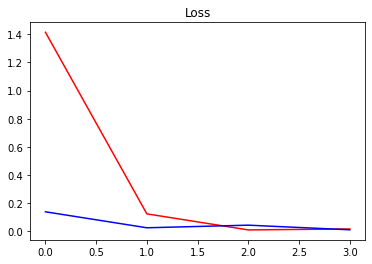

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

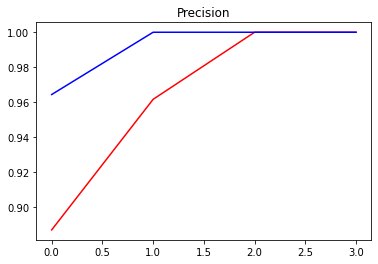

In [ ]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

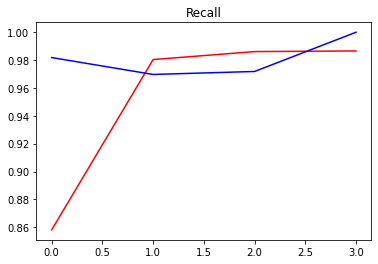

In [ ]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

# 8. Make a Prediction on a Single Clip

## 8.1 Get One Batch and Make a Prediction

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

In [ ]:
yhat = model.predict(X_test)

## 8.2 Convert Logits to Classes 

In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

# 9. Build Forest Parsing Functions

## 9.1 Load up MP3s

In [ ]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
mp3 = os.path.join(base_path, 'Forest Recordings', 'recording_00.mp3')

In [ ]:
wav = load_mp3_16k_mono(mp3)

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [ ]:
samples, index = audio_slices.as_numpy_iterator().next()

## 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [ ]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

## 9.3 Convert Longer Clips and Make Predictions

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [ ]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

## 9.4 Group Consecutive Detections

In [ ]:
from itertools import groupby

In [ ]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [ ]:
calls

7

# 10. Make Predictions

## 10.1 Loop over all recordings and make predictions

In [ ]:
results = {}
for file in os.listdir(os.path.join(base_path, 'Forest Recordings')):
    FILEPATH = os.path.join(base_path,'Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

In [ ]:
results

{'recording_00.mp3': array([[2.85992265e-01],
        [1.01804435e-01],
        [2.60589659e-01],
        [7.81904280e-01],
        [1.00000000e+00],
        [2.20957100e-02],
        [4.57116365e-02],
        [1.45914435e-01],
        [1.83191597e-01],
        [2.16397285e-01],
        [1.66945219e-01],
        [1.14894032e-01],
        [8.48928094e-02],
        [9.99930978e-01],
        [1.00000000e+00],
        [5.70273697e-02],
        [4.15712595e-04],
        [8.94222260e-02],
        [1.94085389e-01],
        [2.69193232e-01],
        [1.76692516e-01],
        [9.31046903e-02],
        [3.54762524e-01],
        [9.26359773e-01],
        [1.00000000e+00],
        [1.23718381e-03],
        [2.91699171e-02],
        [2.60458112e-01],
        [5.76978028e-02],
        [1.82081848e-01],
        [1.21852726e-01],
        [2.50406951e-01],
        [5.64204752e-02],
        [1.29037201e-02],
        [2.51213074e-01],
        [3.01105380e-02],
        [1.00000000e+00],
        [1.3854801

## 10.2 Convert Predictions into Classes

In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_00.mp3': [0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_01.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_02.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_03.mp3': [0,
  0,
  0,
  

## 10.3 Group Consecutive Detections

In [ ]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_00.mp3': 5,
 'recording_01.mp3': 0,
 'recording_02.mp3': 0,
 'recording_03.mp3': 0,
 'recording_04.mp3': 5,
 'recording_05.mp3': 0,
 'recording_06.mp3': 6,
 'recording_07.mp3': 2,
 'recording_08.mp3': 24,
 'recording_09.mp3': 0,
 'recording_10.mp3': 5,
 'recording_11.mp3': 3,
 'recording_12.mp3': 0,
 'recording_13.mp3': 0,
 'recording_14.mp3': 0,
 'recording_15.mp3': 2,
 'recording_16.mp3': 5,
 'recording_17.mp3': 6,
 'recording_18.mp3': 2,
 'recording_19.mp3': 0,
 'recording_20.mp3': 0,
 'recording_21.mp3': 1,
 'recording_22.mp3': 2,
 'recording_23.mp3': 5,
 'recording_24.mp3': 0,
 'recording_25.mp3': 2,
 'recording_26.mp3': 2,
 'recording_27.mp3': 0,
 'recording_28.mp3': 3,
 'recording_29.mp3': 0,
 'recording_30.mp3': 3,
 'recording_31.mp3': 1,
 'recording_32.mp3': 2,
 'recording_33.mp3': 0,
 'recording_34.mp3': 4,
 'recording_35.mp3': 0,
 'recording_36.mp3': 0,
 'recording_37.mp3': 3,
 'recording_38.mp3': 5,
 'recording_39.mp3': 1,
 'recording_40.mp3': 1,
 'recording_41.

# 11. Export Results

In [ ]:
import csv

In [ ]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])